In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Variables
points = 20

# Define the system
F = [[0.2, 0.4], [-0.4, 1]]
G = np.array([[0], [1]])
P0 = np.diag([40, 40])

u = np.array([1])
x_0 = np.transpose([10, 20])
Q = np.diag([1, 2])

# Simulate the system
x = np.zeros((2, points))
P = np.zeros((2, 2, points))
x[:, 0] = x_0
P[:, :, 0] = P0


The system is stable
x_bar =  [2.5 5. ]


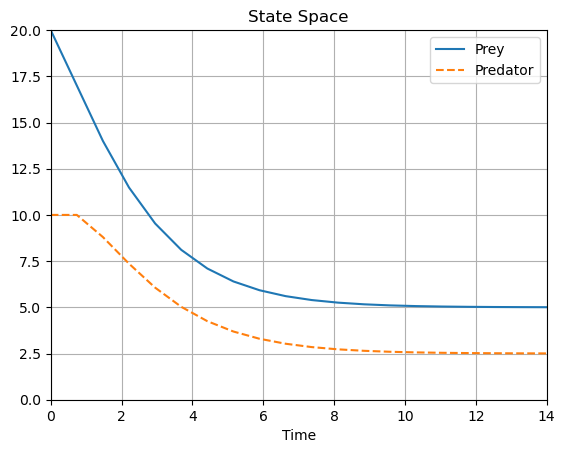

array([[2.99210117, 3.05794685],
       [3.18741706, 7.94076302]])

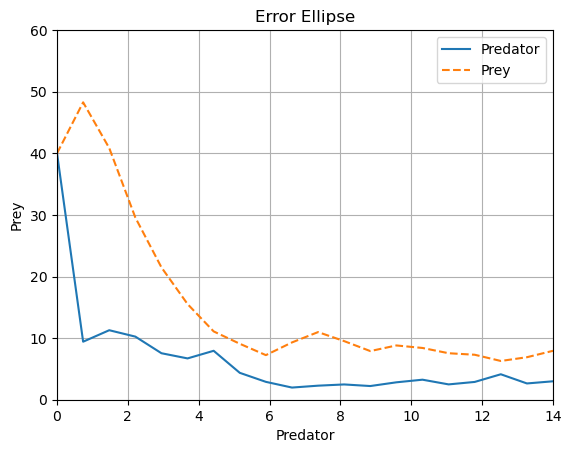

array([[[40.        ,  9.41850744, 11.2826302 , 10.24469691,
          7.54712738,  6.70648691,  7.94296271,  4.36628289,
          2.90113392,  1.97418035,  2.2806472 ,  2.47980429,
          2.22133116,  2.82580795,  3.25163763,  2.48804147,
          2.88769812,  4.13249503,  2.64181323,  2.99210117],
        [ 0.        , 12.67757003, 18.4040658 , 16.0268041 ,
         12.63468192,  8.91725978,  5.47424726,  3.90036961,
          2.23269416,  4.36787329,  6.07717545,  4.62225137,
          3.01009344,  3.92560856,  3.51856386,  2.66471708,
          2.41763836,  1.40782275,  2.01681435,  3.05794685]],

       [[ 0.        , 13.21850744, 19.2826302 , 15.59221691,
         10.44054178,  8.17670669,  8.70653444,  4.80551405,
          3.19842146,  2.21130302,  2.49284706,  2.68185709,
          2.41930807,  3.02216529,  3.4473571 ,  2.68351158,
          3.08307136,  4.32783084,  2.83713464,  3.18741706],
        [40.        , 48.27757003, 40.8520658 , 29.5756041 ,
         21.4805571

In [54]:
for i in range(1, points):
    w = np.reshape(np.random.multivariate_normal([0, 0], Q), (1, 2))
    x[:, i] = (F @ x[:, i-1] + G @ u)
    P[:, :, i] = F @ P[:, :, i-1] @ np.transpose(F) + Q + w

def F_stable(F):
    eigvals, _ = np.linalg.eig(F)
    if np.all(np.abs(eigvals) < 1):
        # Calculate the mean (or final values if the system is stable)
        x_bar = np.linalg.inv(np.eye(2)-F) @ G @ u
        print("The system is stable")
        print('x_bar = ', x_bar)
        return x_bar

F_stable(F)

# Plot the results
plt.plot(np.linspace(0, 14, 20), x[1, :], label='Prey')
plt.plot(np.linspace(0, 14, 20), x[0, :], linestyle='--', label='Predator')
plt.xlabel('Time')
plt.title('State Space')
plt.grid()
plt.ylim(0, 20), plt.xlim(0, 14), plt.legend()
plt.show()

# Obtain P diagonal
P_diag = np.zeros((2, points))
for i in range(points):
    P_diag[:, i] = np.diag(P[:, :, i])

display(P[:, :, -1])
plt.plot(np.linspace(0, 14, 20), P_diag[0, :], label='Predator')
plt.plot(np.linspace(0, 14, 20), P_diag[1, :], linestyle='--', label='Prey')

plt.xlabel('Predator')
plt.ylabel('Prey')
plt.title('Error Ellipse')
plt.grid(), plt.legend()
plt.ylim(0, 60), plt.xlim(0, 14)
plt.show()
display(P)